## Lec9 : Graph Traversals and Computational Graphs

------

-----

# Graph Representation
* Graph is a data structure $\text {G = (V, E)}$: consist of $Vertices$ and $Edges$ 
* Can be either directed or undirected 

## Types of Edges
![image](https://github.com/Youssef-Ashraf71/Sequence-Detector/assets/83988379/3fea15c0-99b4-4931-a75c-6d4c7ade12dc)


## Adjacency Matrix Vs Adjacency list 
![image](https://github.com/Youssef-Ashraf71/Sequence-Detector/assets/83988379/02359837-3e8c-42ba-b8e1-16b2a536294c)


## Graphs 1,2 Visualized

![graphs](https://i.ibb.co/1JrXZXb/graphs.png)

--------

## Adjacencey List Representation

In [29]:
# graph1 
graph1_vertecies = set(list(range(8))) # list(range(8)) a list from 0 to 7 -- then casting it to set 
graph1_adj = {
   0: [1,4],
   1: [0,5],
   2: [5,6],
   3: [7],
   4: [0],
   5: [1,2,6],
   6: [2,5,7],
   7: [3,6]
}
graph2_vertecies = set(list(range(6)))
graph2_adj = {
    0: [1, 3],
    1: [4],
    2: [4, 5],
    3: [1],
    4: [3],
    5: [5]
}

## Matirx Representation
In Python, a matrix representation of a graph can be created using the adjacency list representation. The adjacency list representation represents a graph as a dictionary, where each vertex is a key, and the corresponding value is a list of vertices adjacent to that vertex. To convert this adjacency list representation to a matrix representation, you can follow these steps:

* Create a matrix (2D Numpy Array) (2D list) with dimensions NxN, where N is the number of vertices in the graph. Initialize all elements of the matrix to 0.

* Iterate over each vertex in the adjacency list representation.

* For each vertex, iterate over its adjacent vertices.

* For each adjacent vertex, set the corresponding element in the matrix to 1.

In [30]:
import numpy as np
num_vertices = len(graph1_adj)
adj_matrix1 = np.zeros ((num_vertices,num_vertices))  # N * N as we said , np.zeros >> initialize all the matrix to zeros

for vertex,childs in graph1_adj.items():
     for child in childs :
               adj_matrix1[int(vertex)][int(child)] = 1

# printing the matrix 
print(adj_matrix1)

# or you can write it manually
adj_matrix1_old = [
    [0, 1, 0, 0, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 1, 0, 1],
    [0, 0, 0, 1, 0, 0, 1, 0]
]
# print(adj_matrix1_old)

[[0. 1. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0. 0. 1. 0.]]


# Drawing Graphs

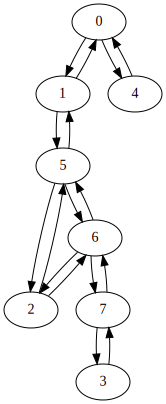

In [31]:
from graphviz import Digraph, Graph
def draw_graph(vertices, edges, directed):

    # Create a new Digraph
    if directed:
      dot = Digraph(format = 'svg')
    else:
      dot = Graph(format = 'svg')

    # Set the direction of the edges to Top-to-Bottom
    dot.attr(rankdir='TB')

    # Add nodes to the graph
    for node in vertices:
        dot.node(name= str(node), label= f"{node}")
    if not directed:
      #  keep track of edges that have already been added to the graph
      already_drawn = set()

    # Add edges to the graph
    for node, edge_list in edges.items():
        for edge in edge_list:
          if directed:
            dot.edge(str(node), str(edge))
          else:
            #  ensure that the order of nodes in the edge does not affect the comparison of edges
            sorted_edges = tuple(sorted([node, edge]))
            #  If the edge has not been added, it adds the edge to the graph using the dot.edge() method 
            # and adds the tuple to the already_drawn set
            if sorted_edges not in already_drawn:
              already_drawn.add(sorted_edges) 
              dot.edge(str(node), str(edge))

    # Render the graph to an SVG file and open it in the default viewer (optional)
    dot.render('graph', format='svg', view=True)
    return dot

draw_graph(graph1_vertecies, graph1_adj, True)


# Graph Traversal 
It is an algorithm (program) that is given: 
* a graph: $G$ 
* a distinguished source vertex: $s$.

The program ${\color{pink} {Systematically}}$
 follows the edges of the graph so as to visit the vertices.

Today, we are exploring: 

* $\textbf{Breadth First Traversal}$: This systematically visits every vertex $v$ in the graph reachable from $s$, while identifying the shortest path from $s$ to $v$.

* $\textbf{Depth First Traversal}$: This systematically visits every vertex  $v$ in the graph reachable from  $s$ following the strategy: 
 1. explores edges out of the most recently discovered vertex $v$ 
 2. Once all of the edges of  $v$ have been explored, the search ${\color{green} {backtracks}}$ to explore other edges leaving the vertex from which $v$ was discovered. 

* $\textbf{Topological Sort}$: Specific only to DAGs (Directed acyclic Graphs), It visists all nodes reachable from s, so as to return a linear sorting of all its vertices such that if C contains an edge from u and v. Then it appears before in this ordering. 



## 1. Breadth First Traversal

With Adj List


at node : 2
at node : 5
at node : 6
at node : 1
at node : 7
at node : 0
at node : 3
at node : 4




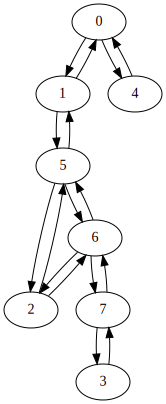

In [78]:
from collections import deque
def bfs_adj(graph,src):
       q = deque() 
       vis = set()
       q.append(src)
       while(len(q)>0): 
           cur = q.popleft()
           if cur  not in vis:
               vis.add(cur)
               print("at node :",cur)
               for child in graph1_adj[cur]:
                        q.append(child)
                    
     
bfs_adj(graph1_adj,2)
print("\n")
draw_graph(graph1_vertecies, graph1_adj, True)

-----------

with adj matrix

In [55]:
def bfs_mat(matrix,src):
     q = deque()
     vis = set()
     q.append(src)
     while (len(q)>0):
         cur = q.popleft()
         if  cur not in vis:
            vis.add(cur)
            print("at node :",cur)
            tmp = matrix[cur]
            for child in range(len(tmp)):
                  if matrix[cur][child] ==1 and child not in vis:
                       q.append(child)                 
bfs_mat(adj_matrix1,2)
print("\n")

at node : 2
at node : 5
at node : 6
at node : 1
at node : 7
at node : 0
at node : 3
at node : 4




---

--------

## Depth first Traversal


with adj list


new DFS search
at node : 0
at node : 1
at node : 5
at node : 2
at node : 6
at node : 7
at node : 3
at node : 4


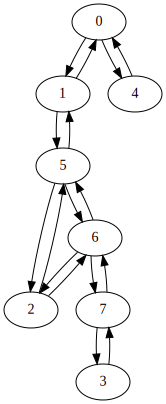

In [79]:
graph1_vertecies = set(list(range(8))) # list(range(8)) a list from 0 to 7 -- then casting it to set 
graph1_adj = {
   0: [1,4],
   1: [0,5],
   2: [5,6],
   3: [7],
   4: [0],
   5: [1,2,6],
   6: [2,5,7],
   7: [3,6]
}


vis = set()
def dfs_adj(graph,node):
       if  node not in vis :
             vis.add(node)
             print("at node :",node)
             childs = graph[node]
             for child in childs :
                   dfs_adj(graph, child)    

                     

for node in graph1_vertecies:       # Loop through each node in the graph vertices
  if node not in vis:    # Check if the node has not been visited before
    print("new DFS search")  # Print a message indicating the start of a new DFS search
    dfs_adj(graph1_adj,node)  

draw_graph(graph1_vertecies, graph1_adj, True)
#
#for node in graph1_vertecies:       # Loop through each node in the graph vertices
#  if node not in vis:    # Check if the node has not been visited before
#    print("new DFS search")  # Print a message indicating the start of a new DFS search
#    dfs_adj(node)          
#    

-

with adj matrix

In [73]:
import numpy as np
# get the number of vertices in the graph
num_vertices = len(graph1_adj)
# initialize a matrix of zeros
adj_matrix = np.zeros((num_vertices, num_vertices))
# iterate over each vertex and its neighbors to fill the matrix
for vertex, neighbors in graph1_adj.items():
    for neighbor in neighbors:
        adj_matrix[vertex][neighbor] = 1



vis = set()            # Create an empty set to store the visited nodes

def dfs_mat(node , adj_matrix):             
        if node not in vis:  # Check if the node has not been visited before
            vis.add(node)   # Add the node to the visited set
            print(f"visit before neibours: {node}")  # Print the visited node
            neighbors = adj_matrix[node]  # Get the neighbors of the current node from the graph edges
            for neighbor_idx in range(len(neighbors)): 
              if( (adj_matrix[node][neighbor_idx]==1) and (neighbor_idx not in vis) ):  
                    dfs_mat(neighbor_idx,adj_matrix)  # Call the DFS function recursively with the current neighbor as input
                      

for node in graph1_vertecies:       # Loop through each node in the graph vertices
  if node not in vis:    # Check if the node has not been visited before
    print("new DFS search")  # Print a message indicating the start of a new DFS search
    dfs_mat(node,adj_matrix)  

new DFS search
visit before neibours: 0
visit before neibours: 1
visit before neibours: 5
visit before neibours: 2
visit before neibours: 6
visit before neibours: 7
visit before neibours: 3
visit before neibours: 4


----

-----------

## $\text  {Topological sort} $

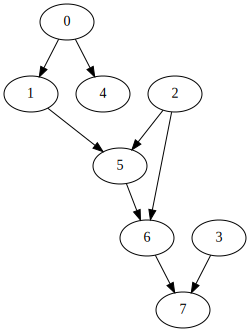

In [91]:
graph3_vertecies = set(list(range(8)))
graph3_adj = {
    0: [1, 4],  
    1: [5],       
    2: [5, 6],  
    3: [7],      
    4: [],       
    5: [6],      
    6: [7],      
    7: []        
}

draw_graph(graph3_vertecies, graph3_adj, True)

In [95]:
vis = set()
arr = []

def dfs_adj(graph,node):
       if  node not in vis :
             vis.add(node)
             childs = graph[node]
             for child in childs :
                   dfs_adj(graph, child)    
             arr.append(node) 
             return arr         

def topo_sort(graph):
     for  node in graph3_vertecies:
           if node not in vis:
              res = dfs_adj(graph,node)
      

# apply topo sort form source node 0 

topo_sort(graph3_adj)      
print(f" reversed top sort order : {arr}")
arr =arr[::-1]
print(f" linear top sort order : {arr}")

 reversed top sort order : [7, 6, 5, 1, 4, 0, 2, 3]
 linear top sort order : [3, 2, 0, 4, 1, 5, 6, 7]
